In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading dataset using read_csv method
dataset = pd.read_csv(r'C:\Users\bruno\Desktop\datasets\winequality-red.csv')

In [3]:
#Looking the 5 first rows of our dataset
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Checking all the data type of our variables
dataset.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
#Checking the shape of dataset (instances and features)
print(dataset.shape)

(1599, 12)


In [6]:
#We could use the "pd.info()" method to check all the previous information at once
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [50]:
#Exploring our target variable column
dataset['quality'].value_counts(normalize=True)

0    0.86429
1    0.13571
Name: quality, dtype: float64

<AxesSubplot:>

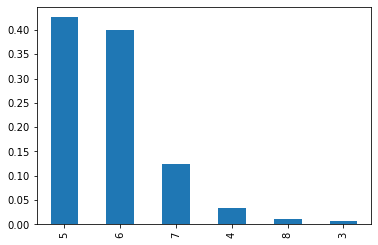

In [8]:
#Basically more than 90% of the quality values is equal or higher than 5
#We dont know the range of this quality values, so, by intuition, a good option here could be a classification aproach
#We can classify quality values above 5 as acceptable(1) and unacceptable(0) for less than 5 values.
dataset['quality'].value_counts(normalize=True).plot.bar()

In [9]:
#Looking for missing values on the dataset
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
#Looking for correlations
corr = dataset.corr()

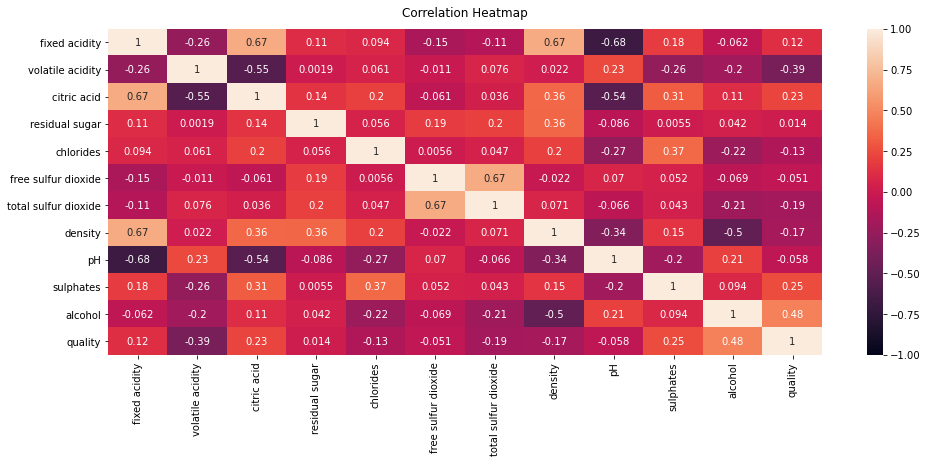

In [11]:
#Ploting the correlation heatmap using seaborn
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [12]:
#We can see strong correlations between pH and fixed acidity, as well between density and fixed acidity
#If this correlations values were greater than 0.9, we could've drop one those for both case and pickup just one to improve our model 
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
#Changing the values above 5(acceptable) to 1 and less than 5 to 0 (unacceptable)
dataset["quality"] = [1 if i>dataset.quality.mean()+1 else 0 for i in dataset.quality]

In [14]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [15]:
#Checking if the transformation to 1 and 0 had worked
dataset['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [16]:
#Preparing our data to feed our models
X = dataset.drop(['quality'], axis = 1)
y = dataset['quality']

In [24]:
#Importing some models for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [25]:
#Using cross-validation through cross_val library to evaluate the choosen models
from sklearn.model_selection import cross_val_score

In [40]:
cross_val_score(LogisticRegression(),X,y).mean()

0.8699196708463951

In [41]:
cross_val_score(svm.SVC(), X, y).mean()

0.8642907523510971

In [42]:
cross_val_score(KNeighborsClassifier(n_neighbors=4), X, y).mean()

0.8499235893416929

In [43]:
cross_val_score(GaussianNB(), X, y).mean()

0.8067927115987461

In [44]:
cross_val_score(DecisionTreeClassifier(random_state=3), X, y).mean()

0.8092535266457679

In [45]:
cross_val_score(RandomForestClassifier(n_estimators=60), X, y).mean()

0.8692966300940439

In [46]:
#By the mean we could see which of the models performed better. Let's do some hyperparameters tuning using GridSearch to check
#the bests pararmeters to fit our models
from sklearn.model_selection import GridSearchCV

In [47]:
#Using dictionarys to store and check the hyperparameters for all of our models
model_params = {'svm': {'model': svm.SVC(gamma = 'auto'),'params': {'C':[1,10,20],'kernel': ['rbf','linear'] }},
    'logistic_regression': {
       'model': LogisticRegression(solver='liblinear', multi_class='auto'),
       'params': {
           'C':[1,5,10]  
        }    
    },
    'random_forest': {
       'model': RandomForestClassifier(),
       'params': {
           'n_estimators':[1,5,10] 
        }    
    },
    'decision_tree': {
       'model': DecisionTreeClassifier(),
       'params': {
            'criterion': ['gini', 'entropy']  
        }    
    },
    'naive_bayes_gaussian': {
       'model': GaussianNB(),
       'params': {}    
    }
        
}    

In [48]:
#Let's iterate thorough our dictionary  and store the bests parameters into an array
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score = False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [37]:
#Let's visualize the scores through a dataframe format
hyper_parameters = pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

In [38]:
#Printing the dataframe
hyper_parameters

,model,best_score,best_params
0,svm,0.864291,"{'C': 1, 'kernel': 'linear'}"
1,logistic_regression,0.869924,{'C': 5}
2,random_forest,0.868047,{'n_estimators': 10}
3,decision_tree,0.819246,{'criterion': 'entropy'}
4,naive_bayes_gaussian,0.806793,{}


In [ ]:
#SVM, Logistc Regression and Random_Forest had have the best performances

In [ ]:
#Storing the model in my local directory
with open('./models/wine_quality_classifier.pkl', 'wb') as f:
     pickle.dump(clf,f)